In [1]:
import numpy as np
import mpmath as mp
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from random_geometry_points.plane import Plane   ### PAra instalar utilizar "pip install random-geometry-points"
from funciones_Sim_ab_initio import *
from scipy.optimize import curve_fit
import scipy.ndimage as ndimage
import numpy.ma as ma

from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate


def Gaussian_2d(x, y, A,mu_x,mu_y,sigma_x,sigma_y):
    G= A*np.exp(-(x-mu_x)**2/(2*sigma_x**2) - (y-mu_y)**2/(2*sigma_y**2) )
    return np.ravel(G)

def gaussian(x, mean, sigma):
    return np.exp(-((x - mean)**2 / (2 * sigma**2)))

def gaussian_norm(x, mean, sigma):
    return ((1)/(sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mean)**2 / (2 * sigma**2)))


In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

ColorMap = 'jet'

# Distribuciones Angulares

In [3]:
###### Definiciones y dominios #######
Phi = np.arange(0, 2 * np.pi, 0.001)
Radio = 100
Theta = np.arange(0, np.pi/2, 0.001)    ### Semi-esfera de radio 100 unidades

long_a = np.arange(0, 10, 0.001)
long_b = np.arange(0, 10, 0.001)

Theta_true = dis_angular(Theta) ## Distribución angular theta real.

E = np.arange(10, 100000, 1)


In [5]:
number_thet = 10
number_points_per_angle = 10

dict_simulation = muon_generator_1(E, Theta, Theta_true, Phi, Radio, long_a, long_b, number_thet, number_points_per_angle)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print('Keys: ', dict_simulation.keys(), end= '\n \n')
print('Len theta: ', len(dict_simulation['Theta_Radianes']))
print('Len phi: ', len(dict_simulation['Phi_radianes']))
# print('Number of planes: ', len(dict_simulation['Points']))
# print('Number of points per plane: ', len(dict_simulation['Points'][0]))
print('Number of simulated muons: ', len(dict_simulation['Points']))
print('Len list energy: ', len(dict_simulation['Energy_per_muon']))

Keys:  dict_keys(['Theta_Radianes', 'Phi_radianes', 'list_random_a', 'list_random_b', 'Points', 'Energy_per_muon'])
 
Len theta:  100
Len phi:  100
Number of simulated muons:  100
Len list energy:  100


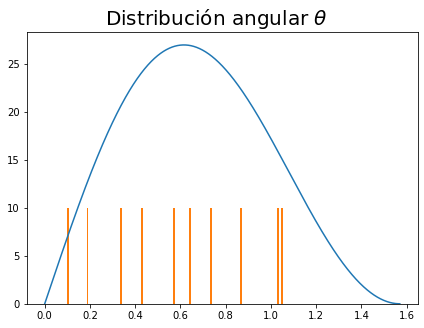

In [ ]:
random_th_array = np.array(dict_simulation['Theta_Radianes'])
random_phi_array = np.array(dict_simulation['Phi_radianes'])

fig, axs = plt.subplots(figsize=[7,5])

# Theta
axs.plot(Theta, 70 * Theta_true)
axs.hist(random_th_array, bins = 110)
fig.suptitle(r'Distribución angular $\theta$', y = 0.95, size = 20)

plt.show()

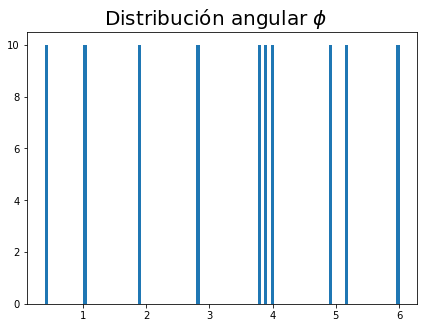

In [ ]:
fig, axs = plt.subplots(figsize=[7,5])

# Phi
axs.hist(random_phi_array, bins = 110)
fig.suptitle(r'Distribución angular $\phi$', y = 0.95, size = 20)

plt.show()

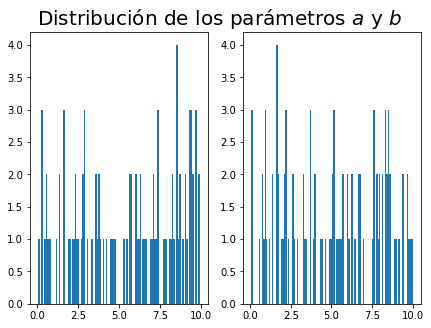

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=[7,5])

# Parameter a
axs[0].hist(dict_simulation['list_random_a'], bins = 110)
axs[1].hist(dict_simulation['list_random_b'], bins = 110)

fig.suptitle(r'Distribución de los parámetros $a$ y $b$', y = 0.95, size = 20)

plt.show()

In [ ]:
dF_dict = pd.DataFrame(dict_simulation)
dF_dict

,Theta_Radianes,Phi_radianes,list_random_a,list_random_b,Points,Energy_per_muon
0,0.862,0.395,8.511,8.577,"[[71.88179426510474], [39.26092951867753], [71...",5893
1,0.862,0.395,6.959,7.747,"[[71.26874754985903], [38.10609813868854], [70...",7489
2,0.862,0.395,9.545,0.111,"[[75.76080486794909], [31.705836439470673], [7...",16407
3,0.862,0.395,4.630,5.606,"[[70.69336481679667], [35.54659566750506], [68...",1601
4,0.862,0.395,9.852,1.690,"[[75.33763752916795], [33.24014523050935], [72...",12205
...,...,...,...,...,...,...
95,1.029,1.883,9.379,8.481,"[[-35.87326177015569], [83.53432389285088], [5...",786
96,1.029,1.883,2.833,6.767,"[[-33.205276251895214], [80.84835637059535], [...",7866
97,1.029,1.883,7.798,0.970,"[[-28.47493128598611], [85.06550459968129], [5...",6477
98,1.029,1.883,7.258,0.159,"[[-27.617603494602168], [85.04960483676852], [...",5357


/tmp/ipykernel_5215/715259870.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  Ax = Axes3D(fig)


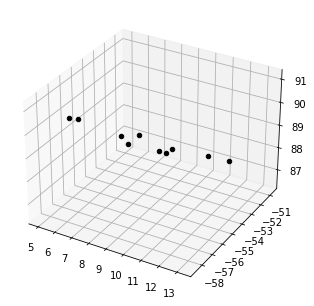

In [ ]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
Ax = Axes3D(fig)

theta = np.arange(0, 2 * np.pi, 0.01)
phi = np.arange(0, np.pi/2, 0.01)
theta, phi = np.meshgrid(theta, phi)

# Definimos los datos de prueba
for i in np.arange(0, len(list_points_per_plane[0])):
    x = list_points_per_plane[0][i][0]
    y = list_points_per_plane[0][i][1]
    z = list_points_per_plane[0][i][2]
    # print(list_points_per_plane[0][i][0])
    Ax.scatter(x, y, z, c='k', marker='o')

x_s = Radio * np.sin(phi) * np.cos(theta)
y_s = Radio * np.sin(phi) * np.sin(theta)
z_s = Radio * np.cos(phi)

# Agregamos los puntos en el plano 3D

ax1.plot_surface(x_s, y_s, z_s)

# Mostramos el gráfico
plt.show()


Coordenadas de un punto:  [[(-66.42468627239163, -16.451798687867427, 73.45785154906528)], [(-60.26630990950633, -22.35271884742817, 76.61053175295828)], [(-61.68762406581528, -21.55358526376747, 75.72545104421212)], [(-61.74934936275447, -27.336396882366863, 74.05925657239479)], [(-59.44342574778086, -20.70782071178821, 77.71266042453823)], [(-59.845698349353256, -20.573250075700198, 77.43652534203726)], [(-60.67166564300068, -16.580076239570566, 77.90953949669833)], [(-58.135708277609226, -15.808206513270916, 80.10365633511542)], [(-67.33165514832618, -17.747886073285134, 72.38773171411975)], [(-57.25493781017444, -24.015363743479888, 78.49430683936394)]]


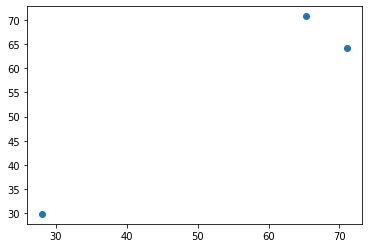

In [ ]:
print('Coordenadas de un punto: ', list_points_per_plane[0])
plt.scatter(list_random_plane_point[0], list_random_plane_point[1])

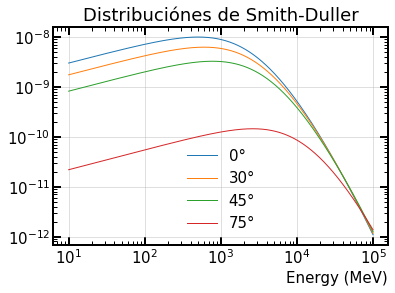

In [7]:
# print(Random_th[0])
E = np.arange(10, 100000, 1)
Thet = [0.0174533, 0.523599, 0.785398, 1.309]     ## En radianes
Ang = [0, 30, 45, 75]

for element in np.arange(0, len(Thet)):
# for element in np.arange(0, 1):
    Energy = dis_energy(E, Thet[element])
    # print(Energy)
    plt.plot(E, Energy, label = str(Ang[element]) + '°')

plt.xlabel('Energy (MeV)')   
plt.grid() 
plt.xscale('log')
plt.yscale('log')
plt.title('Distribuciónes de Smith-Duller')
plt.legend()

del Energy 
del E

In [8]:
Energy = Energy_list(10**(-1), 10**(5), 1000)
# Thet = [0.00174533, 0.785398, 1.309]
Ang = [0.01, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 85, 90]
Ang_array = np.arange(0, 90, 1)
Thet = []
Thet_array = []
list_results = []

for ang in Ang:
    rad = np.radians(ang)
    Thet.append(rad)

for ang in Ang_array:
    rad = np.radians(ang)
    Thet_array.append(rad)

display('Ángulos en radianes: ', Thet)
# Thet = 0.5

for angle in Thet: 
    result = integrate.quad(dis_energy, a = 0, b = np.inf, args = angle)
    list_results.append(result[0]/ (3.52877403746463 *  10**(-5) ))
    del result

print(list_results[0])

res = integrate.quad(dis_energy, a = 0, b = np.inf, args = np.radians(80))
Res = res[0] / (3.52877403746463 *  10**(-5) )
Real = np.cos(np.radians(80))**2

'Ángulos en radianes: '

[0.00017453292519943296,
 0.08726646259971647,
 0.17453292519943295,
 0.2617993877991494,
 0.3490658503988659,
 0.4363323129985824,
 0.5235987755982988,
 0.6108652381980153,
 0.6981317007977318,
 0.7853981633974483,
 0.8726646259971648,
 0.9599310885968813,
 1.0471975511965976,
 1.1344640137963142,
 1.2217304763960306,
 1.3089969389957472,
 1.4835298641951802,
 1.5707963267948966]

0.9999999999999998


/tmp/ipykernel_8616/2912908179.py:27: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res = integrate.quad(dis_energy, a = 0, b = np.inf, args = np.radians(80))


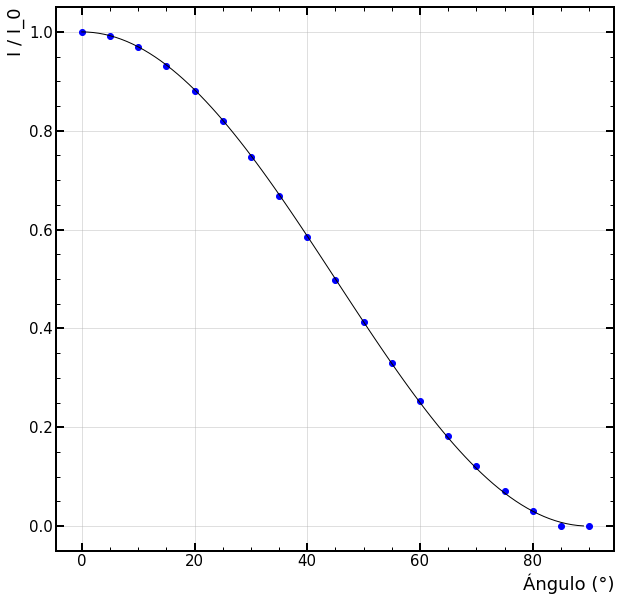

In [9]:
fig, axs = plt.subplots(figsize = [10, 10])
axs.plot(Ang, list_results, 'ob' )
axs.plot(80, Real - Res, 'ob')
axs.plot(Ang_array, np.cos(Thet_array)**2, 'k')
axs.set_xlabel('Ángulo (°)', size = 18)
axs.set_ylabel('I / I_0', size = 18)
axs.grid()

In [ ]:
res = integrate.quad(dis_energy, a = 0, b = np.inf, args = np.radians(80))
Res = res[0] / (3.52877403746463 *  10**(-5) )
Real = np.cos(np.radians(80))**2
print('Valor numérico en 80°: ', Res)
print('Valor real: ', Real)
print(Real - Res)

Valor numérico en 80°:  7.43224205349314e-05
Valor real:  0.03015368960704583
0.0300793671865109


/tmp/ipykernel_13250/3165140647.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res = integrate.quad(dis_energy, a = 0, b = np.inf, args = np.radians(80))


# Deffuse Model

In [3]:
def diffution_curve(z, alpha, beta):
    return np.sqrt(np.abs(alpha * np.log(1 - (beta * z))))

In [4]:
dict_diffuse = {'Alpha' : 7.964, 'Beta' : 2.379 * 10**(-4)}  

### ------------------ PArámetros extra para dibujar la trza ----------------- ###
CCD_deep = 725 # micras
muon_deep = 725 # micras
muon_deep_px = muon_deep/15

CCD_deep_px = CCD_deep / 15 # px
ratio_eV_electron = 1 / 3.7 # e-/eV

print('Profundidad de la CCD: ', CCD_deep, ' micras, o ', np.around(CCD_deep_px, 3), ' píxeles')
print('Profundidad del muon: ', muon_deep, ' micras, o ', muon_deep_px, ' píxeles')

Energy_DP = 185 #keV
Energy_DP_eV = Energy_DP * 10**(3) # eV
electrons = Energy_DP_eV * ratio_eV_electron
ang_theta = 45 # Grados
ang_theta_rad = np.radians(ang_theta)
delta_L = 1000 # micras 

delta_XY = np.sqrt(delta_L**2 - muon_deep )
delta_XY_px = delta_XY / 15
# print(np.around(delta_XY_px, 0))

print('La energía depositada es: ', np.around(electrons, 3), ' e-', end= '\n\n')
print('La longitud XY de la traza es: ', np.around(delta_XY, 3), r' micras, o ', np.around(delta_XY/15, 3), ' píxeles')


list_XY_deep = np.linspace(0, muon_deep_px, int(np.around(delta_XY_px, 0)))
print('La lista que relaciona XY con profundiad tiene longitud: ', len(list_XY_deep))
# print(list_XY_deep * 15)

### --------------------------------------------------------------------------- ###


# print('Profundad de la CCD: ', CCD_deep, ' micras')
# print('Profundad de la CCD: ', np.around(CCD_deep_px, 1), ' píxeles')

Alpha = dict_diffuse['Alpha']
Beta = dict_diffuse['Beta']

# print(Alpha, Beta)
z_deeps = np.arange(7.5, CCD_deep, 7.5) # micras
# z_depps_px = np.arange(0.5, np.around(CCD_deep_px, 1), 1)

# print(z_depps_px)
print('Longitud de la lista de profundidad: ', len(z_deeps))#, len(z_depps_px))

Profundidad de la CCD:  725  micras, o  48.333  píxeles
Profundidad del muon:  725  micras, o  48.333333333333336  píxeles
La energía depositada es:  50000.0  e-

La longitud XY de la traza es:  999.637  micras, o  66.642  píxeles
La lista que relaciona XY con profundiad tiene longitud:  67
Longitud de la lista de profundidad:  96


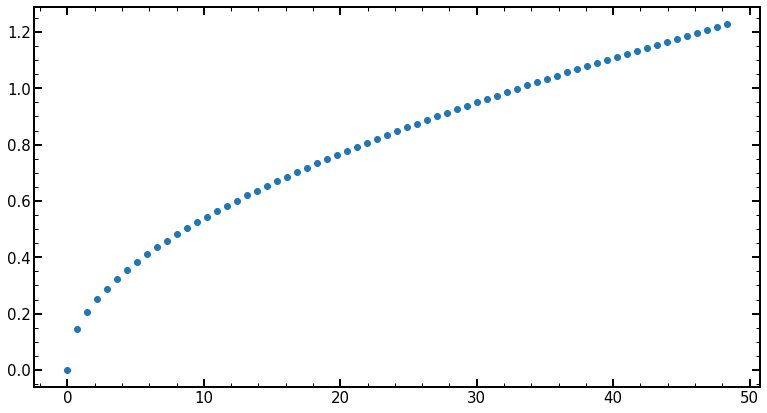

La anchura máxima de la traza es:  5


In [5]:
sigma_values = diffution_curve(list_XY_deep * 15, Alpha, Beta) # micras
# print(len(sigma_values))
# print(len(sigma_values))

fi, axs = plt.subplots(figsize = [13, 7])
axs.plot(list_XY_deep, sigma_values, 'o')
plt.show()

anchura_max = int(np.around(sigma_values[-1] * 4 , 0))
print('La anchura máxima de la traza es: ', anchura_max)

In [6]:
charge_per_line = electrons / delta_XY_px
print('A cada linea de la traza le corresponde de energía ', np.around(charge_per_line, 3), ' e-')
print(int(charge_per_line))

A cada linea de la traza le corresponde de energía  750.272  e-
750


### Muon suavizado

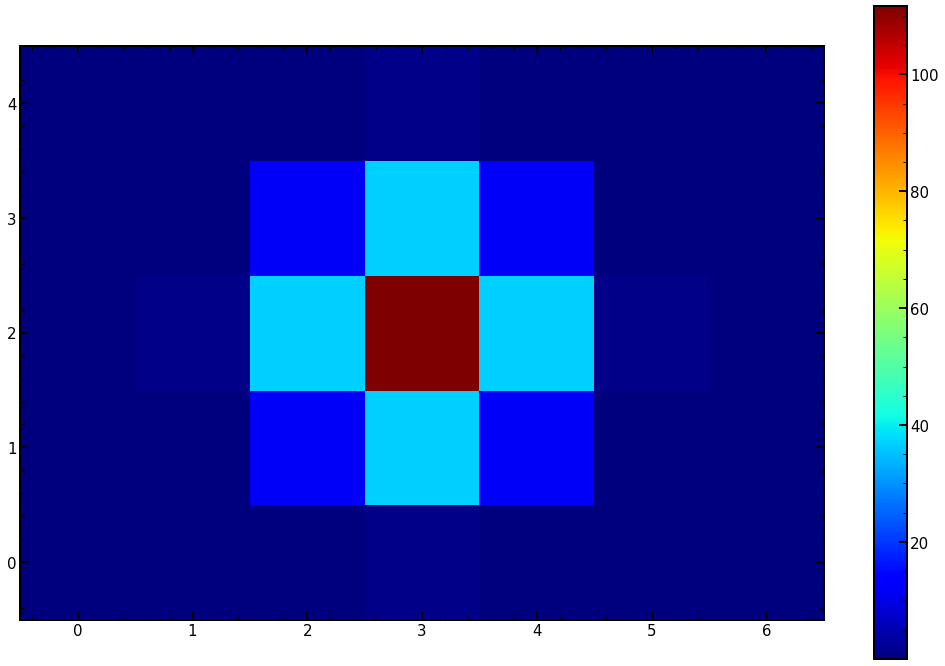

In [41]:
list_gaussians = []
for index in  np.arange(1, len(list_XY_deep)):
    i,j =np.indices([anchura_max, anchura_max + 2])
    center = np.array([(i.max()-i.min())/2.0,(j.max()-j.min())/2.0])

    xc = center[1]
    yc = center[0]

    r = np.hypot(i-yc,j-xc)

    s = sigma_values[index]
    Gaussian = ((charge_per_line/4)/(s * np.sqrt(2 * np.pi))) * np.exp(-r**2/(2 * s**2))
    # print(Gaussian)

    list_gaussians.append(Gaussian)

# print(list_gaussians)
fig = plt.figure(figsize=(18,12))
# plt.imshow(Gaussian)
plt.imshow(list_gaussians[20], cmap= ColorMap)
plt.colorbar()

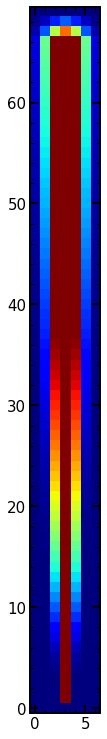

In [42]:
# type(Gaussian_2
list_image_muon = [ ]

initial_row = [[0, 0,  0,  0,  0, 0, 0]]
list_image_muon.append(initial_row)

for index in np.arange(0, len(list_gaussians)):
    rows_gauss = np.vsplit(list_gaussians[index],5)
    # rows_gauss_2 = np.vsplit(list_gaussians[1],5)
    # rows_gauss_3 = np.vsplit(list_gaussians[2],5)
    # rows_gauss_4 = np.vsplit(list_gaussians[3],5)
    # print(rows_gauss[2])
    if index == 0:
        rows_gauss_next = np.vsplit(list_gaussians[index + 1],5)

        list_image_muon.append(rows_gauss[2] + rows_gauss_next[1])
        contribution_1 = rows_gauss[3]
        contribution_2 = rows_gauss[4]

    elif index == 1:
        list_image_muon.append(rows_gauss[2] + contribution_1)
        contribution_1 = rows_gauss[3] + contribution_2
        contribution_2 = rows_gauss[4]

    elif 1 < index < len(list_gaussians) - 1:
        list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
        contribution_1 = rows_gauss[3] + contribution_2
        contribution_2 = rows_gauss[4]

    elif index == len(list_gaussians) - 1 :
        list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
        list_image_muon.append(rows_gauss[3] + contribution_2)
        list_image_muon.append(rows_gauss[4])
        # list_image_muon.append(rows_gauss[5])

final_row = [[0, 0,  0,  0,  0, 0, 0]]
list_image_muon.append(final_row)

# print(list_image_muon[1])
imagen = np.concatenate(list_image_muon, axis = 0)
# Zeros = np.zeros([int(np.around(delta_XY_px,0)), anchura_max])
# print(Zeros.shape)
# x, y = np.meshgrid(i, j)
# plt.imshow(Zeros)
# imagen = np.concatenate((Gaussian_1, Gaussian_2), axis = 0)

fig, axs = plt.subplots(figsize=[8, 13])
x1 = axs.imshow(imagen, vmin=0, vmax=charge_per_line/10, origin= 'lower', cmap= ColorMap)
# fig.colorbar(x1)
plt.show()

### Muon no suavizado (von Neumann)

#### Bidimensional

In [20]:
# x = np.arange(-10, 10, 0.5)
# y = [-5, 5]
print(anchura_max)

i,j = np.indices([anchura_max + 2, anchura_max + 2])
# print(i)
# print(j)


center = np.array([(i.max()-i.min())/2.0,(j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]

r = np.hypot(i-yc,j-xc)

x_side = np.arange(i[0][0], i[-1][0], 1)
y_side = np.arange(j[0][0], j[0][-1], 1)
z_side = np.arange(0, 1, 0.01)

# print(x_side)
# print(y_side)
# dis_gaussian_1D = gaussian(x_c, r, 1.4)
# dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
list_pixels_matrix = []
dict_pix = {}
n_array = 0

for index in np.arange(1, len(sigma_values)):
    # list_x_true = []
    # list_y_true = []
    pixels_array = np.zeros(shape = (anchura_max + 2, anchura_max + 2)) 

    sigma = sigma_values[index]
    # print(sigma)

    dis_gaussian_1D_x = gaussian(x_side, xc, sigma)
    dis_gaussian_1D_y = gaussian(y_side, yc, sigma)
    # dis_gaussian_1D_z = gaussian(z_side, 5, sigma)
    # print(dis)
    n = 0
    while n < int(charge_per_line):
        # print(dis_gaussian_1D)
        n = n + 1

        # dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
        Random_x = rand.choices(x_side, dis_gaussian_1D_x) 
        Random_y = rand.choices(y_side, dis_gaussian_1D_y) 
        # print(Random_x, Random_y)

        pixels_array[Random_x[0]][Random_y[0]] =  pixels_array[Random_x[0]][Random_y[0]] + 1

        # list_x_true.append(Random_x[0])
        # list_y_true.append(Random_y[0])
    
        # list_x_true.append(dis_gaussian_1D)
    
    # list_pixels_matrix.append(pixels_array)
    dict_pix[str(n_array)] = pixels_array
    n_array = n_array + 1

    

print('Center: ', xc, yc)
print(sigma)


5
Center:  3.0 3.0
1.227899169639873


dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65'])


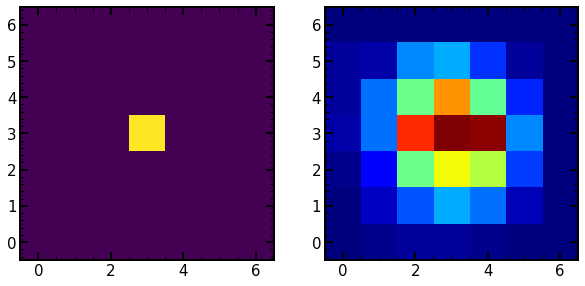

In [22]:
index = 65
print(dict_pix.keys())

fig, axs = plt.subplots(1,2,figsize = [10,9])
axs[0].imshow(dict_pix['0'])
axs[1].imshow(dict_pix['65'], cmap = 'jet')

8


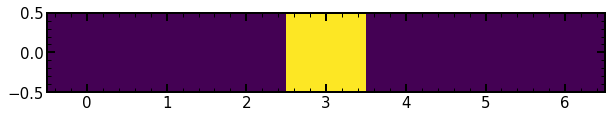

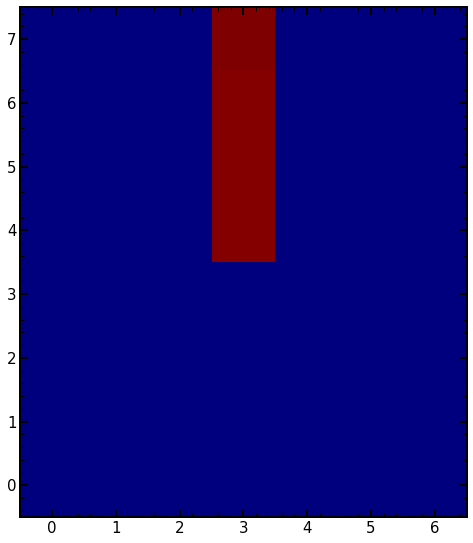

In [24]:
list_image_muon = [ ]
# print(len(list_pixels_matrix[0]))
list_keys = list(dict_pix.keys())
# print(type(list_keys[0]))

rows_gauss = np.vsplit(dict_pix[list_keys[0]],len(dict_pix[list_keys[0]]))

fig, axs = plt.subplots(figsize = [10,9])
axs.imshow(rows_gauss[3])

initial_row = [[0, 0,  0,  0,  0, 0, 0]]
list_image_muon.append(initial_row)

n_pixel = [1]
m_row = 1

for index in np.arange(0, len(list_keys)):
    # rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]][0]))

    # for index_row in np.arange(0, m_row):
    #     list_image_muon.append(rows_gauss[index_row])
    #     m_row = m_row + 1
    
    if index == 0:
        # print(index)
        rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]][0]))

        rows_gauss_next_1 = np.vsplit(dict_pix[list_keys[index + 1]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_2 = np.vsplit(dict_pix[list_keys[index + 2]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_3 = np.vsplit(dict_pix[list_keys[index + 3]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_4 = np.vsplit(dict_pix[list_keys[index + 4]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_5 = np.vsplit(dict_pix[list_keys[index + 5]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_6 = np.vsplit(dict_pix[list_keys[index + 6]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_7 = np.vsplit(dict_pix[list_keys[index + 7]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_8 = np.vsplit(dict_pix[list_keys[index + 8]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_9 = np.vsplit(dict_pix[list_keys[index + 9]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_10 = np.vsplit(dict_pix[list_keys[index + 10]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_11 = np.vsplit(dict_pix[list_keys[index + 11]],len(dict_pix[list_keys[index]][0]))
        rows_gauss_next_12 = np.vsplit(dict_pix[list_keys[index + 12]],len(dict_pix[list_keys[index]][0]))

        list_image_muon.append(rows_gauss[0])
        list_image_muon.append(rows_gauss[1] + rows_gauss_next_1[0])
        list_image_muon.append(rows_gauss[2] + rows_gauss_next_1[1] + rows_gauss_next_2[0])
        list_image_muon.append(rows_gauss[3] + rows_gauss_next_1[2] + rows_gauss_next_2[1] + rows_gauss_next_3[0])
        list_image_muon.append(rows_gauss[4] + rows_gauss_next_1[3] + rows_gauss_next_2[2] + rows_gauss_next_3[1] + rows_gauss_next_4[0])
        list_image_muon.append(rows_gauss[5] + rows_gauss_next_1[4] + rows_gauss_next_2[3] + rows_gauss_next_3[2] + rows_gauss_next_4[1] + rows_gauss_next_5[0])
        list_image_muon.append(rows_gauss[6] + rows_gauss_next_1[5] + rows_gauss_next_2[4] + rows_gauss_next_3[3] + rows_gauss_next_4[2] + rows_gauss_next_5[1] + rows_gauss_next_6[0])
        # list_image_muon.append(rows_gauss[7] + rows_gauss_next_1[6] + rows_gauss_next_2[5] + rows_gauss_next_3[4] + rows_gauss_next_4[3] + rows_gauss_next_5[2] + rows_gauss_next_6[1] + rows_gauss_next_7[0])

    # len(list_keys) - 6
    # if 0 < index < 5 :
    #     # print(index)
    #     rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]][0]))

    #     rows_gauss_next_1 = np.vsplit(dict_pix[list_keys[index + 1]],len(dict_pix[list_keys[index]][0]))
    #     rows_gauss_next_2 = np.vsplit(dict_pix[list_keys[index + 2]],len(dict_pix[list_keys[index]][0]))
    #     rows_gauss_next_3 = np.vsplit(dict_pix[list_keys[index + 3]],len(dict_pix[list_keys[index]][0]))
    #     rows_gauss_next_4 = np.vsplit(dict_pix[list_keys[index + 4]],len(dict_pix[list_keys[index]][0]))
    #     rows_gauss_next_5 = np.vsplit(dict_pix[list_keys[index + 5]],len(dict_pix[list_keys[index]][0]))
    #     rows_gauss_next_6 = np.vsplit(dict_pix[list_keys[index + 6]],len(dict_pix[list_keys[index]][0]))

    #     list_image_muon.append(rows_gauss[3] + rows_gauss_next_1[2] + rows_gauss_next_2[1] + rows_gauss_next_3[0])
    #     list_image_muon.append(rows_gauss[4] + rows_gauss_next_1[3] + rows_gauss_next_2[2] + rows_gauss_next_3[1] + rows_gauss_next_4[0])
    #     list_image_muon.append(rows_gauss[5] + rows_gauss_next_1[4] + rows_gauss_next_2[3] + rows_gauss_next_3[2] + rows_gauss_next_4[1] + rows_gauss_next_5[0])
    #     list_image_muon.append(rows_gauss[6] + rows_gauss_next_1[5] + rows_gauss_next_2[4] + rows_gauss_next_3[3] + rows_gauss_next_4[2] + rows_gauss_next_5[1] + rows_gauss_next_6[0])

        # list_image_muon.append(rows_gauss_next[0])
        # list_image_muon.append(rows_gauss_next[1])
        # list_image_muon.append(rows_gauss_next[2])
        # list_image_muon.append(rows_gauss_next[3])
        # list_image_muon.append(rows_gauss_next[4])
        # list_image_muon.append(rows_gauss_next[5])
        # list_image_muon.append(rows_gauss_next[6])
        # list_image_muon.append(rows_gauss[7])
    #     contribution_1 = rows_gauss[3]
    #     contribution_2 = rows_gauss[4]

    # elif index == 1:
    #     list_image_muon.append(rows_gauss[2] + contribution_1)
    #     contribution_1 = rows_gauss[3] + contribution_2
    #     contribution_2 = rows_gauss[4]

    # elif 1 < index < len(list_gaussians) - 1:
    #     list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
    #     contribution_1 = rows_gauss[3] + contribution_2
    #     contribution_2 = rows_gauss[4]

    # elif index == len(list_gaussians) - 1 :
    #     list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
    #     list_image_muon.append(rows_gauss[3] + contribution_2)
    #     list_image_muon.append(rows_gauss[4])
    #     # list_image_muon.append(rows_gauss[5])

# final_row = [[0, 0,  0,  0,  0, 0, 0]]
# list_image_muon.append(final_row)

print(len(list_image_muon))
imagen = np.concatenate(list_image_muon, axis = 0)
# Zeros = np.zeros([int(np.around(delta_XY_px,0)), anchura_max])
# print(Zeros.shape)
# x, y = np.meshgrid(i, j)
# plt.imshow(Zeros)
# imagen = np.concatenate((Gaussian_1, Gaussian_2), axis = 0)

fig, axs = plt.subplots(figsize=[8, 13])
x1 = axs.imshow(imagen, origin = 'lower', cmap= ColorMap)#, vmin=0, vmax=charge_per_line/10)
# fig.colorbar(x1)
plt.show()

59016.0


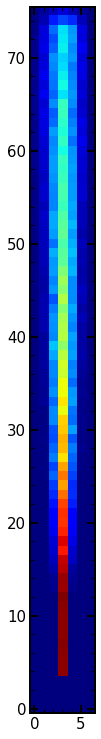

In [25]:
for index in np.arange(0, len(list_keys)):
    rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]]))

    # rows_gauss_2 = np.vsplit(list_gaussians[1],5)
    # rows_gauss_3 = np.vsplit(list_gaussians[2],5)
    # rows_gauss_4 = np.vsplit(list_gaussians[3],5)
    # print(rows_gauss[2])
    if index == 0:
        rows_gauss_next = np.vsplit(dict_pix[list_keys[index + 1]],len(dict_pix[list_keys[index + 1]]))

        list_image_muon.append(rows_gauss[3] + rows_gauss_next[1])
        contribution_1 = rows_gauss[3]
        contribution_2 = rows_gauss[4]

    elif index == 1:
        list_image_muon.append(rows_gauss[2] + contribution_1)
        contribution_1 = rows_gauss[3] + contribution_2
        contribution_2 = rows_gauss[4]

    elif 1 < index < len(list_keys) - 1:
        list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
        contribution_1 = rows_gauss[3] + contribution_2
        contribution_2 = rows_gauss[4]

    elif index ==len(list_keys) - 1 :
        list_image_muon.append(rows_gauss[2] + contribution_1 + contribution_2)
        list_image_muon.append(rows_gauss[3] + contribution_2)
        list_image_muon.append(rows_gauss[4])
        # list_image_muon.append(rows_gauss[5])

# final_row = [[0, 0,  0,  0,  0, 0, 0]]
# list_image_muon.append(final_row)

imagen = np.concatenate(list_image_muon, axis = 0)
# Zeros = np.zeros([int(np.around(delta_XY_px,0)), anchura_max])
# print(Zeros.shape)
# x, y = np.meshgrid(i, j)
# plt.imshow(Zeros)
# imagen = np.concatenate((Gaussian_1, Gaussian_2), axis = 0)

print(imagen.sum())

fig, axs = plt.subplots(figsize=[8, 13])
x1 = axs.imshow(imagen, origin = 'lower',cmap = ColorMap)
# fig.colorbar(x1)
plt.show()

#### Unidimensional (vertical)

In [35]:
# x = np.arange(-10, 10, 0.5)
# y = [-5, 5]
print(anchura_max)

i,j = np.indices([1, anchura_max + 2])
# print(i)
# print(j)


center = np.array([(i.max()-i.min())/2.0,(j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]
print(center)

r = np.hypot(i-yc,j-xc)

# x_side = np.arange(i[0][0], i[-1][0], 1)
y_side = np.arange(j[0][0], j[0][-1], 1)
# z_side = np.arange(0, 1, 0.01)

# print(x_side)
# print(y_side)
# dis_gaussian_1D = gaussian(x_c, r, 1.4)
# dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
list_pixels_matrix = []
dict_pix = {}
n_array = 0


pixels_array = np.zeros(shape = (1, anchura_max + 2))
list_pixels_matrix.append(pixels_array)


for index in np.arange(1, len(sigma_values)):
    # list_x_true = []
    # list_y_true = []
    pixels_array = np.zeros(shape = (1, anchura_max + 2)) 
    # print(pixels_array)

    sigma = sigma_values[index]
    # print(sigma)

    # dis_gaussian_1D_x = gaussian(x_side, xc, sigma)
    dis_gaussian_1D_y = gaussian(y_side, xc, sigma)
    # print(dis_gaussian_1D_y)
    # dis_gaussian_1D_z = gaussian(z_side, 5, sigma)
    # print(dis)
    n = 0
    while n < int(charge_per_line):
        # print(dis_gaussian_1D)
        n = n + 1

        # dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
        # Random_x = rand.choices(x_side, dis_gaussian_1D_x) 
        Random_y = rand.choices(y_side, dis_gaussian_1D_y) 
        # print(Random_x, Random_y)

        pixels_array[0][Random_y[0]] =  pixels_array[0][Random_y[0]] + 1

        # list_x_true.append(Random_x[0])
        # list_y_true.append(Random_y[0])
    
        # list_x_true.append(dis_gaussian_1D)
    
    # print(Random_y[0])
    list_pixels_matrix.append(pixels_array)
    # dict_pix[str(n_array)] = pixels_array
    # n_array = n_array + 1

pixels_array = np.zeros(shape = (1, anchura_max + 2))
list_pixels_matrix.append(pixels_array)


print('Center: ', xc, yc)
print(sigma)


5
[0. 3.]
Center:  3.0 0.0
1.227899169639873


dict_keys([])


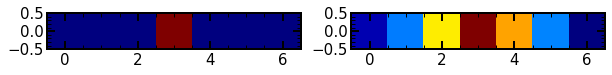

In [39]:
index = 65
print(dict_pix.keys())

fig, axs = plt.subplots(1,2,figsize = [10,9])
axs[0].imshow(list_pixels_matrix[1], cmap = 'jet')
axs[1].imshow(list_pixels_matrix[-2], cmap = 'jet')

49500.0


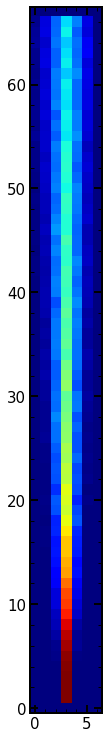

In [37]:
# for index in np.arange(0, len(list_keys)):
#     rows_gauss = np.vsplit(dict_pix[list_keys[index]],len(dict_pix[list_keys[index]]))

imagen = np.concatenate(list_pixels_matrix, axis = 0)
# Zeros = np.zeros([int(np.around(delta_XY_px,0)), anchura_max])
# print(Zeros.shape)
# x, y = np.meshgrid(i, j)
# plt.imshow(Zeros)
# imagen = np.concatenate((Gaussian_1, Gaussian_2), axis = 0)

print(imagen.sum())

fig, axs = plt.subplots(figsize=[8, 13])
x1 = axs.imshow(imagen, origin = 'lower',cmap = ColorMap)
# fig.colorbar(x1)
plt.show()

#### Perfil de Energías

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


750.0 750.0


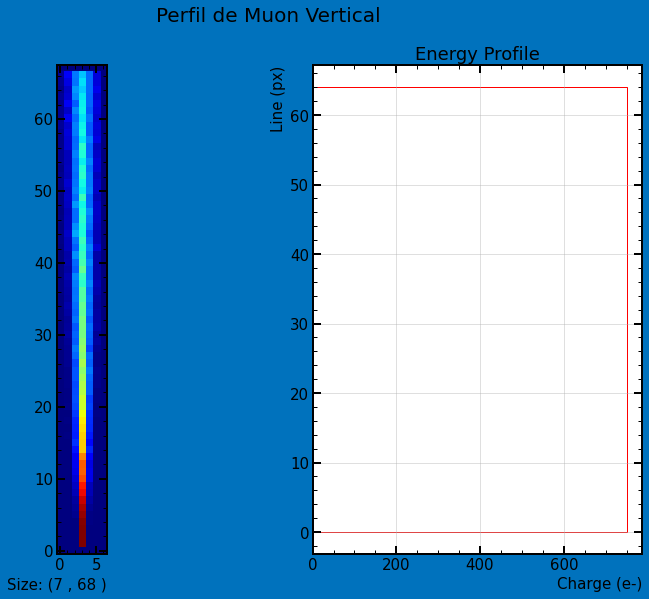

In [33]:
## Muons Extention 4
# muons_vertical_labels_1 = [[73], [3], [6], [14], [27]] #, 23,  27, 40, 43, 46, 49, 59, 85, 92, 94, 98] # Extensión 4

# muon_label = 73  # Se coloca directamente el label del evento

Delta_inicial = 1
Delta_final = 1
extension = 4

fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [13,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

# for event in matrix_ext_4_vertical[num:num + 1]:

# event = check_flip_vertical_muon(dict= data_histogram, label_muon=muon_label, Delta_in=Delta_inicial, Delta_fin=Delta_final, extension=extension)
event = imagen
# plt.imshow(event)
size_x = event.shape[1] # tamaño en x
size_y = event.shape[0] # tamaño en y
# print(event.sum())

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

charge_verticalMuon = []
for lable_line in np.arange(Delta_inicial, nlabels_verticalMuon - Delta_final):
    line = label_verticalMuon == lable_line
    loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
    mask_35 = np.invert(label_verticalMuon == lable_line)
    data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
    # print(len(data_mask[0]))
    charge = data_mask.sum()
    # print(charge)
    mean_charge = data_mask.mean()

    charge_verticalMuon.append(charge)
    # print(charge)

## Linea inferior ##
# line_inf = [size_x]
# axs[0].imshow(data_mask)
print(charge_verticalMuon[0], charge_verticalMuon[-1])

axs[0].imshow(event, origin='lower', cmap = 'jet')
# axs[0].set_title('Muon ' + str(muon_label))
axs[0].set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
# x0bar = fig.colorbar(x0, ax=axs[0])

axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', color = 'r')#,  hatch = '////')
# axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
axs[1].set_xlabel('Charge (e-)')
axs[1].set_ylabel('Line (px)')
# axs[1].set_ylim(0,len(event) - 1 )
axs[1].set_title('Energy Profile')
axs[1].legend()
axs[1].grid()
plt.show()

#### Unidimensional (horizontal)

In [41]:
# x = np.arange(-10, 10, 0.5)
# y = [-5, 5]
print(anchura_max)

i,j = np.indices([anchura_max + 2, 1])
# print(i)
# print(j)


center = np.array([(i.max()-i.min())/2.0,(j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]
print(center)

r = np.hypot(i-yc,j-xc)

# x_side = np.arange(i[0][0], i[-1][0], 1)
y_side = np.arange(i[0][0], i[0][-1], 1)
# z_side = np.arange(0, 1, 0.01)

# print(x_side)
# print(y_side)
# dis_gaussian_1D = gaussian(x_c, r, 1.4)
# dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
list_pixels_matrix = []
dict_pix = {}
n_array = 0


pixels_array = np.zeros(shape = ( anchura_max + 2, 1))
list_pixels_matrix.append(pixels_array)


for index in np.arange(1, len(sigma_values)):
    # list_x_true = []
    # list_y_true = []
    pixels_array = np.zeros(shape = (anchura_max + 2, 1)) 
    # print(pixels_array)

    sigma = sigma_values[index]
    # print(sigma)

    # dis_gaussian_1D_x = gaussian(x_side, xc, sigma)
    dis_gaussian_1D_y = gaussian(y_side, xc, sigma)
    # print(dis_gaussian_1D_y)
    # dis_gaussian_1D_z = gaussian(z_side, 5, sigma)
    # print(dis)
    n = 0
    while n < int(charge_per_line):
        # print(dis_gaussian_1D)
        n = n + 1

        # dis_gaussian_1D = np.exp(-r**2/(2 * sigma**2))
        # Random_x = rand.choices(x_side, dis_gaussian_1D_x) 
        Random_y = rand.choices(y_side, dis_gaussian_1D_y) 
        # print(Random_x, Random_y)

        pixels_array[Random_y[0]][0] =  pixels_array[Random_y[0]][0] + 1

        # list_x_true.append(Random_x[0])
        # list_y_true.append(Random_y[0])
    
        # list_x_true.append(dis_gaussian_1D)
    
    # print(Random_y[0])
    list_pixels_matrix.append(pixels_array)
    # dict_pix[str(n_array)] = pixels_array
    # n_array = n_array + 1

pixels_array = np.zeros(shape = (1, anchura_max + 2))
list_pixels_matrix.append(pixels_array)


print('Center: ', xc, yc)
print(sigma)


5
[3. 0.]


IndexError: list index out of range

## Ajuste de doble gaussiana

In [17]:
x = np.linspace(0, anchura_max, anchura_max)
y = np.linspace(0, anchura_max, anchura_max)
x, y = np.meshgrid(x, y)

popt, pcov = curve_fit(Gaussian_2d, np.ravel(Gaussian_1))

NameError: name 'Gaussian_1' is not defined